## This is a notebook for supplementary figures for Albright et al., in prep.

August-September FSNSC (Clearsky net solar flux at surface)

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps as gvcmaps
import geocat.viz.util as gvutil
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import numpy as np
import xarray as xr
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter

In [23]:
def open_file(file):
    path = "/glade/u/home/malbright/nam_manuscript_figures/climatology_files_remapped/FSNSC/"
    ds = (
        xr.open_dataset(path + file)
        .sel(lat=slice(9, 43), lon=slice(230, 280))
        .isel(time=0)
    ).FSNSC
    return ds

In [24]:
# FSNS - Net shortwave flux
## high res
plio_fsns = open_file(
    "b.e13.B1850C5CN.ne120_g16.pliohiRes.002.cam.h0.FSNSC.003008-005909.AS.remap.nc"
)
pi_fsns = open_file(
    "b.e13.B1850C5CN.ne120_g16.tuning.005.cam.h0.FSNSC.007008-009909.AS.remap.nc"
)

## low res
plio_fsns_lr = open_file(
    "b.e13.B1850C5CN.ne30_g16.plio.001.cam.h0.FSNSC.037608-042509.AS.remap.nc"
)
pi_fsns_lr = open_file(
    "b.e13.B1850C5CN.ne30_g16.pi.001.cam.h0.FSNSC.023908-028809.AS.remap.nc"
)

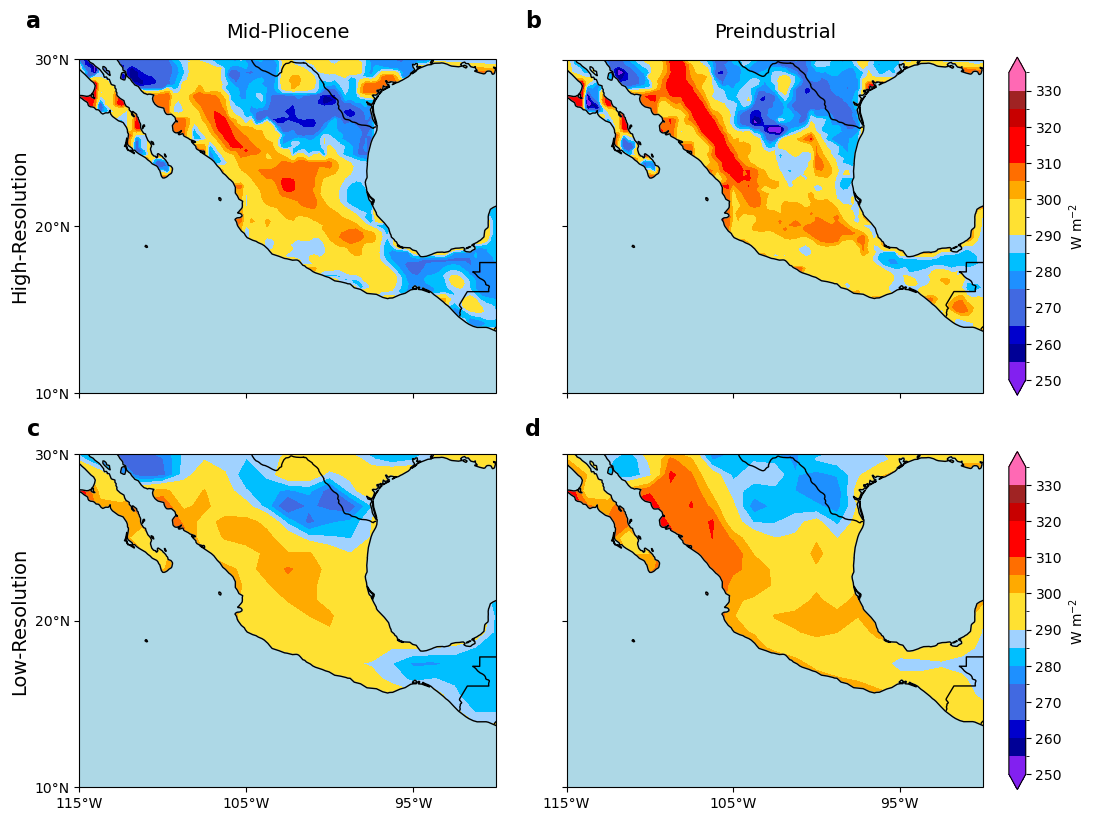

In [ ]:
# Specify projection for maps
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(13, 10))
grid = fig.add_gridspec(
    ncols=2, nrows=2, width_ratios=[0.85, 1.061], wspace=0.15, hspace=0.05
)

###############################
# CREATE AXES
###############################

ax1 = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(grid[0, 1], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(grid[1, 0], projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(grid[1, 1], projection=ccrs.PlateCarree())

for ax in [ax1, ax2, ax3, ax4]:
    ax.add_feature(cfeature.OCEAN, zorder=2)
    ax.add_feature(cfeature.COASTLINE, zorder=4)
    ax.add_feature(cfeature.BORDERS)

###############################
# FORMAT SUBPLOTS
###############################

# Format ticks and ticklabels for the map axes
for ax in [ax1, ax2, ax3, ax4]:
    gvutil.set_axes_limits_and_ticks(
        ax,
        xlim=(-115, -90),
        ylim=(10, 30),
        xticks=np.linspace(-130, -90, 13),
        yticks=np.linspace(15, 50, 7),
    )

ax1.xaxis.set_tick_params(labelleft=False)
ax1.yaxis.set_major_formatter(LatitudeFormatter())

ax2.xaxis.set_tick_params(labelleft=False)
ax2.yaxis.set_tick_params(labelleft=False)

ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())

ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_tick_params(labelleft=False)

###################################################
# HIGH-RES PLOTS
###################################################

# Pliocene

# Get the RGBA array from the original colormap
colors = gvcmaps.amwg_blueyellowred.colors  # this is already a list/array of defined colors

# Find the middle two indices
n = len(colors)
mid = n // 2

# Remove the middle two and the last color
keep = list(range(n))
# for idx in [mid, mid-1, n-1]:
for idx in [mid, mid-1]:   # adjust order to ensure both middle entries go
    keep.remove(idx)

new_colors = [colors[i] for i in keep]

# Build a new colormap
newcmp = mcolors.ListedColormap(new_colors, name="amwg_blueyellowred_trimmed")

# Define contour levels
levels = np.arange(250, 340, 5)

# Define dictionary for kwargs
kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),  # nice x ticks
    yticks=np.arange(10, 35, 10),  # nice y ticks
    add_colorbar=False,  # allow for colorbar specification later
    transform=ccrs.PlateCarree(),  # ds projection
    extend='both'
)

fillplot1 = plio_fsns.plot.contourf(ax=ax1, cmap=newcmp, **kwargs)

gvutil.set_titles_and_labels(ax1, xlabel="", ylabel="High-Resolution", labelfontsize=14)

ax1.set_title("Mid-Pliocene", fontsize=14, loc="center", y=1.04)

# Preindustrial

fillplot2 = pi_fsns.plot.contourf(ax=ax2, cmap=newcmp, **kwargs)

cbar_mcs = fig.colorbar(fillplot2, shrink=0.9, label=r"W m$^{-2}$")

gvutil.set_titles_and_labels(ax2, xlabel="", ylabel="")
ax2.set_title("Preindustrial", fontsize=14, loc="center", y=1.04)

###################################################
# LOW-RES PLOTS
###################################################

# Pliocene

fillplot3 = plio_fsns_lr.plot.contourf(ax=ax3, cmap=newcmp, **kwargs)

gvutil.set_titles_and_labels(ax3, xlabel="", ylabel="Low-Resolution", labelfontsize=14)

ax3.set_title("", fontsize=14, loc="center", y=1.04)

# Preindustrial

fillplot4 = pi_fsns_lr.plot.contourf(ax=ax4, cmap=newcmp, **kwargs)

cbar_mcs = fig.colorbar(fillplot4, shrink=0.9, label=r"W m$^{-2}$")

gvutil.set_titles_and_labels(ax4, xlabel="", ylabel="")
ax4.set_title("", fontsize=14, loc="center", y=1.04)

text_kwargs = dict(ha="center", va="center", fontsize=16, fontweight="bold")
plt.text(-147, 56, 'a', **text_kwargs)
plt.text(-117, 56, 'b', **text_kwargs)
plt.text(-147, 31.5, 'c', **text_kwargs)
plt.text(-117, 31.5, 'd', **text_kwargs)

# Show the plot
plt.show()
# plt.savefig("figures/final_supplement_AS_FSNS.png", dpi=150, bbox_inches="tight")

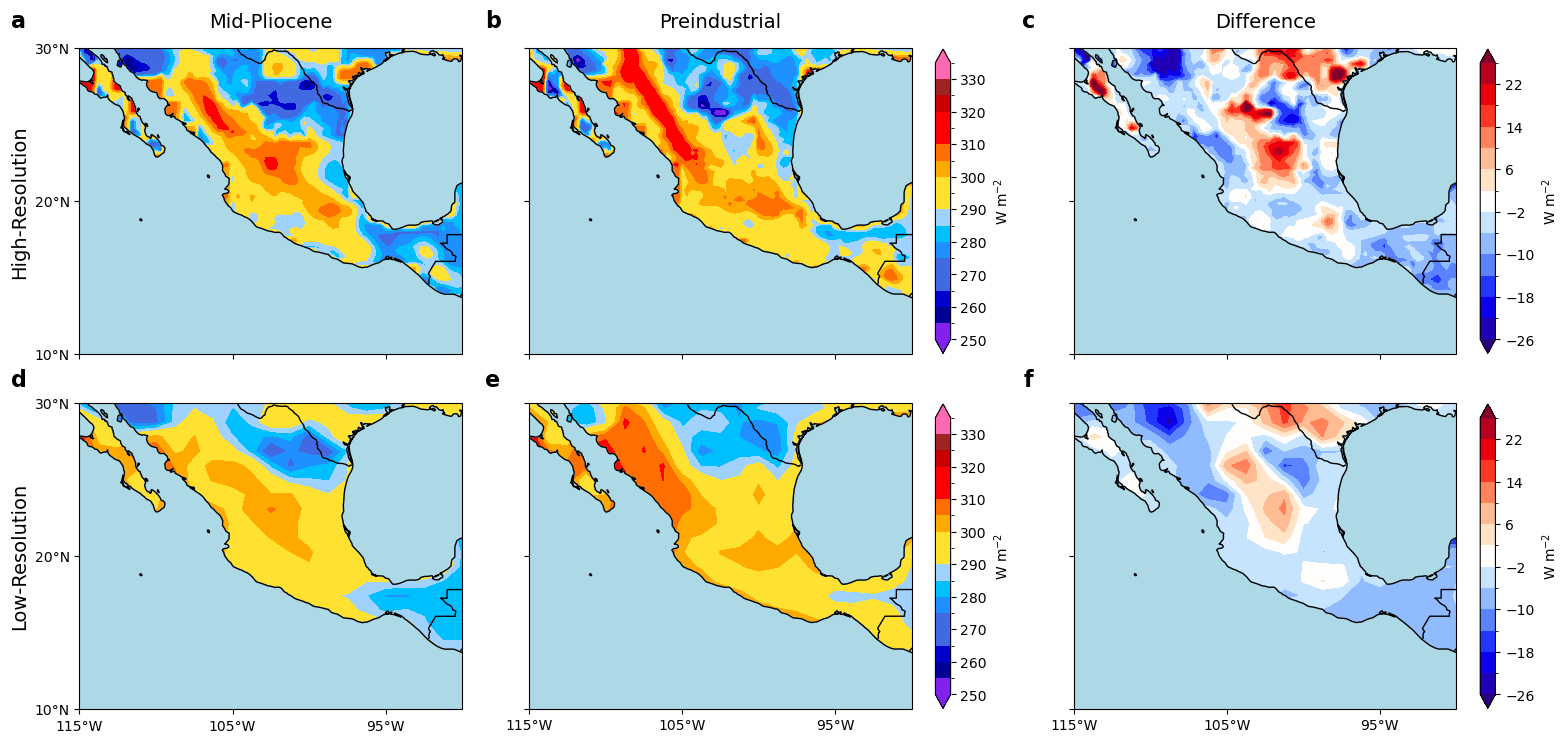

In [ ]:
# Specify projection for maps
proj = ccrs.PlateCarree()

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(19, 9))
grid = fig.add_gridspec(
    ncols=3, nrows=2, width_ratios=[0.85, 1.061, 1.061], wspace=0.15, hspace=0.05
)

###############################
# CREATE AXES
###############################

ax1 = fig.add_subplot(grid[0, 0], projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(grid[0, 1], projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(grid[1, 0], projection=ccrs.PlateCarree())
ax4 = fig.add_subplot(grid[1, 1], projection=ccrs.PlateCarree())
ax5 = fig.add_subplot(grid[0, 2], projection=ccrs.PlateCarree())
ax6 = fig.add_subplot(grid[1, 2], projection=ccrs.PlateCarree())

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.add_feature(cfeature.OCEAN, zorder=2)
    ax.add_feature(cfeature.COASTLINE, zorder=4)
    ax.add_feature(cfeature.BORDERS)

###############################
# FORMAT SUBPLOTS
###############################

# Format ticks and ticklabels for the map axes
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    gvutil.set_axes_limits_and_ticks(
        ax,
        xlim=(-115, -90),
        ylim=(10, 30),
        xticks=np.linspace(-130, -90, 13),
        yticks=np.linspace(15, 50, 7),
    )

ax1.xaxis.set_tick_params(labelleft=False)
ax1.yaxis.set_major_formatter(LatitudeFormatter())

ax2.xaxis.set_tick_params(labelleft=False)
ax2.yaxis.set_tick_params(labelleft=False)

ax5.xaxis.set_tick_params(labelleft=False)
ax5.yaxis.set_tick_params(labelleft=False)

ax3.xaxis.set_major_formatter(LongitudeFormatter())
ax3.yaxis.set_major_formatter(LatitudeFormatter())

ax4.xaxis.set_major_formatter(LongitudeFormatter())
ax4.yaxis.set_tick_params(labelleft=False)

ax6.xaxis.set_major_formatter(LongitudeFormatter())
ax6.yaxis.set_tick_params(labelleft=False)

###################################################
# HIGH-RES PLOTS
###################################################

# Pliocene

# Get the RGBA array from the original colormap
colors = gvcmaps.amwg_blueyellowred.colors

# Find the middle two indices
n = len(colors)
mid = n // 2

# Remove the middle two and the last color
keep = list(range(n))
for idx in [mid, mid-1]:   # adjust order to ensure both middle entries go
    keep.remove(idx)

new_colors = [colors[i] for i in keep]

# Build a new colormap
newcmp = mcolors.ListedColormap(new_colors, name="amwg_blueyellowred_trimmed")

# Define contour levels
levels = np.arange(250, 340, 5)

# Define dictionary for kwargs
kwargs = dict(
    levels=levels,
    xticks=np.arange(-115, -90, 10),
    yticks=np.arange(10, 35, 10),
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    extend='both'
)

fillplot1 = plio_fsns.plot.contourf(ax=ax1, cmap=newcmp, **kwargs)

gvutil.set_titles_and_labels(ax1, xlabel="", ylabel="High-Resolution", labelfontsize=14)

ax1.set_title("Mid-Pliocene", fontsize=14, loc="center", y=1.04)

# Preindustrial

fillplot2 = pi_fsns.plot.contourf(ax=ax2, cmap=newcmp, **kwargs)

cbar_mcs = fig.colorbar(fillplot2, shrink=0.9, label=r"W m$^{-2}$")

gvutil.set_titles_and_labels(ax2, xlabel="", ylabel="")
ax2.set_title("Preindustrial", fontsize=14, loc="center", y=1.04)


# difference
hr_diff = plio_fsns - pi_fsns
diffcmp = gvcmaps.NCV_blu_red

diff_levels = np.arange(-26, 26.1, 4)
kwargs_diff = dict(
    levels=diff_levels,
    xticks=np.arange(-115, -90, 10),
    yticks=np.arange(10, 35, 10),
    add_colorbar=False,
    transform=ccrs.PlateCarree(),
    extend='both'
)

fillplot_diff = hr_diff.plot.contourf(ax=ax5, cmap=diffcmp, **kwargs_diff)

cbar_mcs = fig.colorbar(fillplot_diff, shrink=0.9, label=r"W m$^{-2}$")

gvutil.set_titles_and_labels(ax5, xlabel="", ylabel="")
ax5.set_title("Difference", fontsize=14, loc="center", y=1.04)

###################################################
# LOW-RES PLOTS
###################################################

# Pliocene

fillplot3 = plio_fsns_lr.plot.contourf(ax=ax3, cmap=newcmp, **kwargs)

gvutil.set_titles_and_labels(ax3, xlabel="", ylabel="Low-Resolution", labelfontsize=14)

ax3.set_title("", fontsize=14, loc="center", y=1.04)

# Preindustrial

fillplot4 = pi_fsns_lr.plot.contourf(ax=ax4, cmap=newcmp, **kwargs)

cbar_mcs = fig.colorbar(fillplot4, shrink=0.9, label=r"W m$^{-2}$")

gvutil.set_titles_and_labels(ax4, xlabel="", ylabel="")
ax4.set_title("", fontsize=14, loc="center", y=1.04)

# difference

diff = plio_fsns_lr - pi_fsns_lr

fillplot_diff_lr = diff.plot.contourf(ax=ax6, cmap=diffcmp, **kwargs_diff)

cbar_mcs = fig.colorbar(fillplot_diff_lr, shrink=0.9, label=r"W m$^{-2}$")

gvutil.set_titles_and_labels(ax6, xlabel="", ylabel="")
ax6.set_title("", fontsize=14, loc="center", y=1.04)


text_kwargs = dict(ha="center", va="center", fontsize=16, fontweight="bold")
plt.text(-184, 55, 'a', **text_kwargs)
plt.text(-153, 55, 'b', **text_kwargs)
plt.text(-118, 55, 'c', **text_kwargs)
plt.text(-184, 31.5, 'd', **text_kwargs)
plt.text(-153, 31.5, 'e', **text_kwargs)
plt.text(-118, 31.5, 'f', **text_kwargs)

# fig.suptitle("August-September FSNSC", weight="bold", y=0.92)

# Show the plot
# plt.show()
plt.savefig("figures/final_supplement_AS_FSNSC.png", dpi=150, bbox_inches="tight")

#### Grabbing data: